In [1]:
from __future__ import division
import sys
sys.path.append('../config')
sys.path.append('../viewer')

%matplotlib inline
from pylab import *
import os
import glob
from pandas import *
from pandas import datetime
import re
import pyresample as pr
from ipywidgets import interactive
import itertools
import plots_daily as pd
import plots_aggregated as pa
import os.path

##### Get the configuration variables

In [2]:
import config_osi450 as cfg
#from config.config_amsr2 import *
#from config_ssmi import *
#from config_emissivity import *

In [ ]:
cfg.data_dir

##### Plot the Standard Deviation as a Function of the Date

In [ ]:
# data_dir, output_dir, area_config_path, bin_intervals, results_output
vp = pa.ValidationPlots(cfg.data_dir, cfg.path_to_plots, 
                        cfg.path_area_config, cfg.bin_intervals, cfg.RESULTS_PATHS)
stats = vp.line_plots('stddev', 0, 50)
stats = vp.line_plots('bias', -50, 50)

# Save to excel
#stats.to_excel('/home/jol/Documents/Programs/data_analaysis/validation/bias_std_amsr2.xls')

In [ ]:
stats['water_bias'].plot()

##### Plot the Within ±10 % and ±20 % Charts

In [ ]:
plot(stats['ice_bias'])

In [ ]:
stats['intermediate_bias'].plot()

In [ ]:
print(cfg.RESULTS_PATHS)
!pwd

In [ ]:
vp.barcharts(ymin=0, ymax=100)

In [ ]:
os.path.join('../', cfg.path_area_config)

### Look at the data for a given day

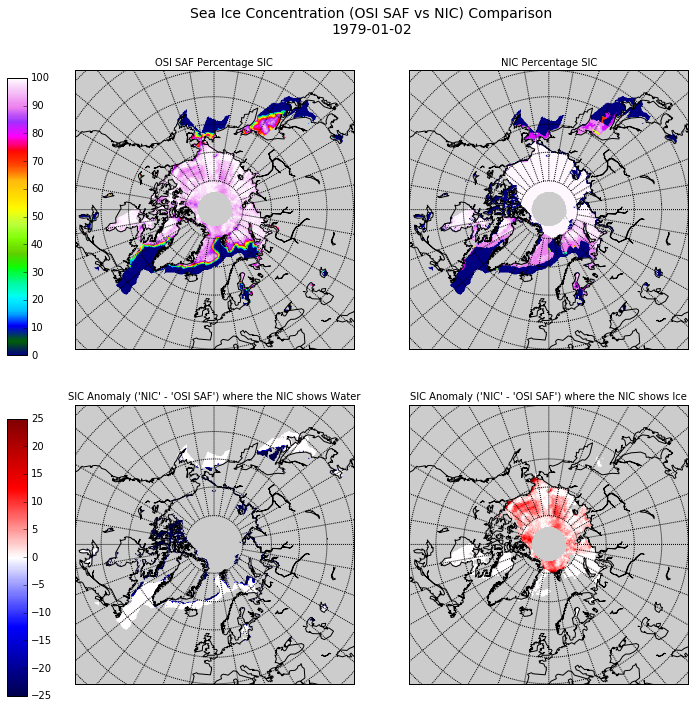

In [4]:
reload(pd)
vplots = pd.ValidationPlots(cfg.path_to_hdf5, os.path.join('../', cfg.path_area_config), 'EASE2')
vplots.hemisphere = 'NH' # 'NH' for the Northern Hemisphere and 'SH' for the Southern
dates = dict(zip(*[vplots.dates, range(len(vplots.dates))]))
def interact_out(date, plot_type):
    dateidx = dates[date] if isinstance(date, (unicode, str)) else date
    getattr(vplots, plot_type)(dateidx)
    
matplotlib.rcParams.update({'font.size': 10})
plot_types = ['plot_both_maps_with_anomaly_i', 'plot_hemisphere', 'plot_kde', 'scatter', 
              'hex_bin', 'heat_map_log']
hemispheres = ['NH', 'SH']
interactive(interact_out, date=(0, len(vplots.dates)-1, 1), plot_type=plot_types)
#interactive(interact_out, date=list(vplots.dates), plot_type=plot_types)

Make a movie of the plots

In [ ]:
pd.make_video('plot_both_maps_with_anomaly',
              '/data/jol/validation/plots/plot_map_with_anolomoly/')

In [ ]:
vplots = pd.ValidationPlots(cfg.path_to_hdf5, cfg.path_area_config, 'EASE2')
vplots.hemisphere = 'NH'
ref, sat = vplots.get_ref_sat('all')

In [ ]:
diff = (ref - sat).mean(axis=2)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(11, 11))
palette2 = plt.cm.seismic
palette2.set_bad(color='k', alpha=0.25)
fig = vplots.plot_hemisphere('NH', ax1, diff, vmin=-100, vmax=100, cmap=palette2)
title('Mean Spatial Anomaly in SIC (Ice-Chart - OSI-SAF)')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1000)
y = np.sin(x)

for i in range(5000):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, y)
    plt.close(fig)

print(plt.get_fignums())

#for i in range(500):
#    fig = plt.figure()
#    ax = fig.add_subplot(1, 1, 1)
#    ax.plot(x, y)
#    fig.clf()

#print(plt.get_fignums())